In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('Social_Network_Ads.csv')

In [8]:
df.head()

C:\Users\spree\anaconda3\lib\site-packages\IPython\core\formatters.py:342: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
C:\Users\spree\anaconda3\lib\site-packages\IPython\core\formatters.py:342: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [7]:
df=df.iloc[:,2:]

In [9]:
df.sample(5)

C:\Users\spree\anaconda3\lib\site-packages\IPython\core\formatters.py:342: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,Age,EstimatedSalary,Purchased
388,47,34000,1
327,42,75000,0
162,37,33000,0
203,41,71000,0
76,18,52000,0


## Train-Test-Split

In [10]:
from sklearn.model_selection import train_test_split as tts

In [12]:
X_train,X_test,Y_train,Y_test=tts(df.drop('Purchased',axis=1),
                                df['Purchased'],
                                test_size=0.3,
                                random_state=0)

X_train.shape,X_test.shape

((280, 2), (120, 2))

## Standardization

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler=StandardScaler()

In [15]:
scaler.fit(X_train)

StandardScaler()

In [16]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [19]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [21]:
np.round(X_train.describe(),1)

C:\Users\spree\anaconda3\lib\site-packages\IPython\core\formatters.py:342: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [23]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [24]:
X_train_scaled

C:\Users\spree\anaconda3\lib\site-packages\IPython\core\formatters.py:342: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [25]:
np.round(X_train_scaled.describe(),1)

C:\Users\spree\anaconda3\lib\site-packages\IPython\core\formatters.py:342: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


## Plotting

Text(0.5, 1.0, 'After')

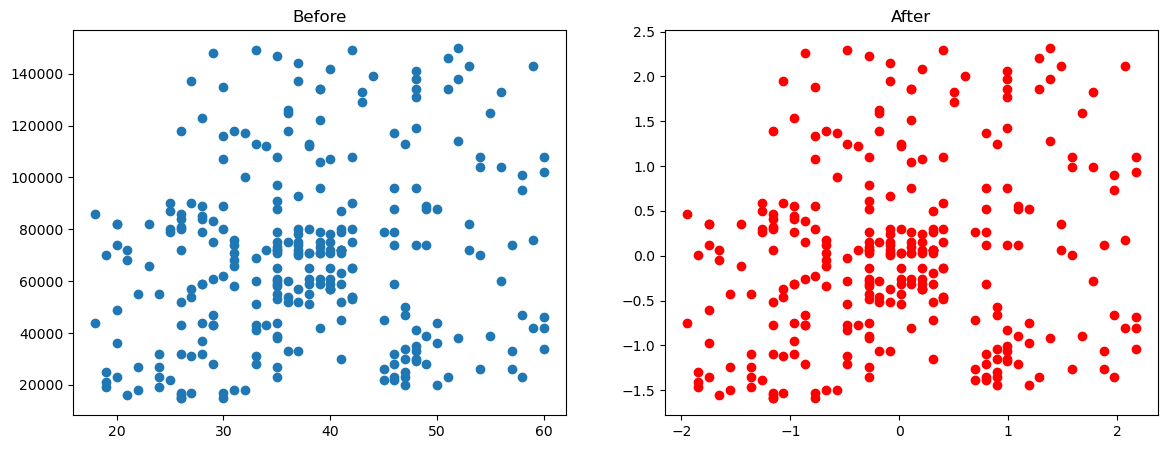

In [31]:
fig,(ax1,ax2)= plt.subplots(ncols=2,figsize=(14,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title('After')

C:\Users\spree\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\spree\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


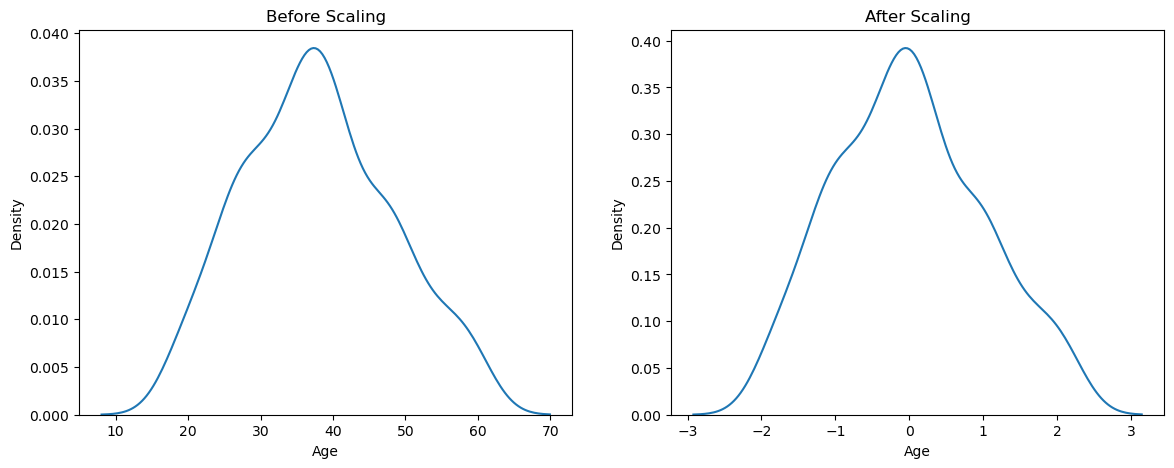

In [37]:
fig,(ax1,ax2)= plt.subplots(ncols=2,figsize=(14,5))
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'],ax=ax1)
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
plt.show()

## Need of Scaling

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [40]:
lr.fit(X_train,Y_train)
lr_scaled.fit(X_train_scaled,Y_train)

LogisticRegression()

In [42]:
pred=lr.predict(X_test)
pred_sc=lr_scaled.predict(X_test_scaled)

In [43]:
from sklearn.metrics import accuracy_score

In [46]:
print("Actual",accuracy_score(Y_test,pred))
print("Scaled",accuracy_score(Y_test,pred_sc))

Actual 0.6583333333333333
Scaled 0.8666666666666667
